In [1]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import keras
import tensorflow
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
gt=pd.read_csv("gas_turbines.csv")

In [ ]:
gt

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [ ]:
gt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [ ]:
gt.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


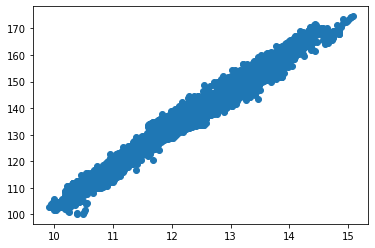

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x="CDP",y="TEY",data=gt)#which is linerly co-related

<AxesSubplot:>

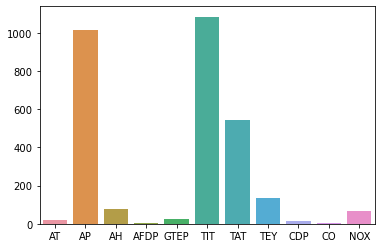

In [ ]:
sns.barplot(data=gt)

(array([ 247., 2671.,  474.,  528., 7145.,  462.,  989., 1215., 1160.,
         148.]),
 array([100.17 , 107.614, 115.058, 122.502, 129.946, 137.39 , 144.834,
        152.278, 159.722, 167.166, 174.61 ]),
 <BarContainer object of 10 artists>)

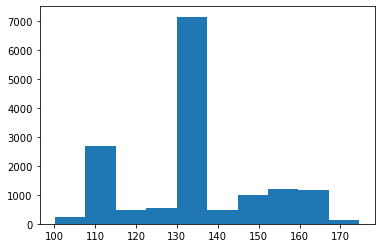

In [ ]:
plt.hist(gt['TEY'])

In [ ]:
#here according to question the target variable is TEY i.e(Turbine Energy Yeild)

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
scaler = StandardScaler()
standardized_gt=scaler.fit_transform(gt)
df=pd.DataFrame(standardized_gt, columns=gt.columns)

In [5]:
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.231172,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.229909,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.230541,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.229909,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.229909,-1.350985,0.574179,1.348591
...,...,...,...,...,...,...,...,...,...,...,...
15034,-1.153182,-1.185428,1.401860,-0.865850,-1.498657,-2.063184,0.103453,-1.426381,-1.543161,1.145792,1.085751
15035,-1.303986,-1.138630,1.447753,-0.913470,-1.438759,-2.268905,-0.276638,-1.415642,-1.513247,1.293578,1.119943
15036,-1.386267,-1.076233,1.476971,-0.951488,-1.410967,-2.789257,-1.026650,-1.516089,-1.467922,2.695925,2.170062
15037,-1.420423,-0.998236,1.441590,-0.988848,-1.447624,-2.456474,-0.528337,-1.481343,-1.422598,1.924683,2.391165


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [ ]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04
mean,-2.320107e-16,-1.925280e-14,1.844983e-16,3.810001e-16,1.107344e-16,-2.324212e-15,1.744899e-15,1.406445e-15,3.640356e-16,1.953355e-17,-6.862579e-17
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
min,-2.276462e+00,-4.266288e+00,-3.536594e+00,-2.779497e+00,-1.806771e+00,-5.021933e+00,-4.188141e+00,-2.149097e+00,-1.992416e+00,-8.874862e-01,-3.861033e+00
25%,-8.392292e-01,-6.706510e-01,-6.796337e-01,-6.266930e-01,-5.091458e-01,-2.540512e-01,-4.101146e-01,-3.919003e-01,-4.354335e-01,-5.015202e-01,-6.578107e-01
50%,5.566605e-02,-6.227861e-02,2.277844e-01,-1.854065e-02,-8.075681e-02,2.965544e-01,5.712570e-01,-2.580448e-02,-7.011925e-02,-2.620452e-01,-1.518527e-01
75%,8.051309e-01,5.772924e-01,7.916582e-01,4.612196e-01,4.228638e-01,7.382490e-01,5.928675e-01,4.236815e-01,4.311680e-01,8.455882e-02,5.486567e-01
max,2.266234e+00,3.275970e+00,1.528011e+00,4.486233e+00,2.871006e+00,1.028678e+00,6.627839e-01,2.553607e+00,2.700105e+00,1.895949e+01,4.937717e+00


In [6]:
X=df.drop(["TEY"],axis=1)
y=df["TEY"]

In [7]:
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.350985,0.574179,1.348591
...,...,...,...,...,...,...,...,...,...,...
15034,-1.153182,-1.185428,1.401860,-0.865850,-1.498657,-2.063184,0.103453,-1.543161,1.145792,1.085751
15035,-1.303986,-1.138630,1.447753,-0.913470,-1.438759,-2.268905,-0.276638,-1.513247,1.293578,1.119943
15036,-1.386267,-1.076233,1.476971,-0.951488,-1.410967,-2.789257,-1.026650,-1.467922,2.695925,2.170062
15037,-1.420423,-0.998236,1.441590,-0.988848,-1.447624,-2.456474,-0.528337,-1.422598,1.924683,2.391165


In [8]:
y

0       -1.231172
1       -1.229909
2       -1.230541
3       -1.229909
4       -1.229909
           ...   
15034   -1.426381
15035   -1.415642
15036   -1.516089
15037   -1.481343
15038   -1.428277
Name: TEY, Length: 15039, dtype: float64

In [9]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [10]:
n_features =X.shape[1]
n_features

10

In [ ]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=n_features, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    #here we take loss func as means_squared_error coz its regression classifier
    optmizer =RMSprop(0.03)#Learning_rate is 0.03
    model.compile(loss='mean_squared_error', optimizer=optmizer, metrics=['accuracy'])
    return model

In [ ]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END ..................batch_size=10, epochs=10; total time=  37.1s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END ..................batch_size=10, epochs=10; total time=  29.0s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END ..................batch_size=10, epochs=10; total time=  28.1s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END ..................batch_size=10, epochs=10; total time=  29.5s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END ..................batch_size=10, epochs=10; total time=  31.3s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END ..................batch_size=10

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.0, using {'batch_size': 10, 'epochs': 10}
0.0,0.0 with: {'batch_size': 10, 'epochs': 10}
0.0,0.0 with: {'batch_size': 10, 'epochs': 50}
0.0,0.0 with: {'batch_size': 10, 'epochs': 100}
0.0,0.0 with: {'batch_size': 20, 'epochs': 10}
0.0,0.0 with: {'batch_size': 20, 'epochs': 50}
0.0,0.0 with: {'batch_size': 20, 'epochs': 100}
0.0,0.0 with: {'batch_size': 40, 'epochs': 10}
0.0,0.0 with: {'batch_size': 40, 'epochs': 50}
0.0,0.0 with: {'batch_size': 40, 'epochs': 100}


In [ ]:
#so we get best batch size as 10 and best epoch as 10

In [ ]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = n_features,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = n_features,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss='mean_squared_error',optimizer = adam,metrics = ['accuracy'])
    return model


In [ ]:
# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=  20.5s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=  19.8s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=  14.1s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=  14.3s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=  13.0s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 2/9] END ......dropout_rate=0.0, learning_rate=0.01; total time=  14.5s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 2/9] END ......dropout_rate=0.0, learning_rate=0.01; total time=  22.9s
[CV 3/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 2/9] END ......dropout_rate=0.0, learning_rate=0.01; total time=  14.5s
[CV 4/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 2/9] END ......dropout_rate=0.0, learning_rate=0.01; total time=  14.4s
[CV 5/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 2/9] END ......dropout_rate=0.0, learning_rate=0.01; total time=  13.6s
[CV 1/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time=  12.3s
[CV 2/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time=  19.0s
[CV 3/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time=  13.6s
[CV 4/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time=  18.7s
[CV 5/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time=  13.5s
[CV 1/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 4/9] END .....dropout_rate=0.1, learning_rate=0.001; total time=  21.9s
[CV 2/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 4/9] END .....dropout_rate=0.1, learning_rate=0.001; total time=  21.2s
[CV 3/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 4/9] END .....dropout_rate=0.1, learning_rate=0.001; total time=  16.3s
[CV 4/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 4/9] END .....dropout_rate=0.1, learning_rate=0.001; total time=  14.1s
[CV 5/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 4/9] END .....dropout_rate=0.1, learning_rate=0.001; total time=  13.6s
[CV 1/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 5/9] END ......dropout_rate=0.1, learning_rate=0.01; total time=  13.3s
[CV 2/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 5/9] END ......dropout_rate=0.1, learning_rate=0.01; total time=  23.3s
[CV 3/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 5/9] END ......dropout_rate=0.1, learning_rate=0.01; total time=  22.1s
[CV 4/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 5/9] END ......dropout_rate=0.1, learning_rate=0.01; total time=  16.8s
[CV 5/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 5/9] END ......dropout_rate=0.1, learning_rate=0.01; total time=  21.4s
[CV 1/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time=  22.6s
[CV 2/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time=  18.8s
[CV 3/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time=  18.0s
[CV 4/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time=  23.0s
[CV 5/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time=  19.9s
[CV 1/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 7/9] END .....dropout_rate=0.2, learning_rate=0.001; total time=  22.4s
[CV 2/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 7/9] END .....dropout_rate=0.2, learning_rate=0.001; total time=  23.0s
[CV 3/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 7/9] END .....dropout_rate=0.2, learning_rate=0.001; total time=  22.1s
[CV 4/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 7/9] END .....dropout_rate=0.2, learning_rate=0.001; total time=  22.1s
[CV 5/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 7/9] END .....dropout_rate=0.2, learning_rate=0.001; total time=  14.9s
[CV 1/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=  18.1s
[CV 2/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=  20.0s
[CV 3/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=  16.2s
[CV 4/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=  18.4s
[CV 5/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=  19.5s
[CV 1/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 9/9] END .......dropout_rate=0.2, learning_rate=0.1; total time=  16.4s
[CV 2/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 9/9] END .......dropout_rate=0.2, learning_rate=0.1; total time=  18.6s
[CV 3/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 9/9] END .......dropout_rate=0.2, learning_rate=0.1; total time=  19.2s
[CV 4/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 9/9] END .......dropout_rate=0.2, learning_rate=0.1; total time=  18.3s
[CV 5/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 9/9] END .......dropout_rate=0.2, learning_rate=0.1; total time=  18.1s


G:\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.0, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.0,0.0 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.0,0.0 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.0,0.0 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.0,0.0 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.0,0.0 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.0,0.0 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.0,0.0 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.0,0.0 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.0,0.0 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [ ]:
def create_model(neuron1,neuron2):#to determine the no for hidden layers neuron
    model = Sequential()
    model.add(Dense(neuron1,input_dim = n_features,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dense(1,activation = 'sigmoid'))
    
    optmizer =RMSprop(0.001)#here,Learning_rate is 0.03
    model.compile(loss='binary_crossentropy', optimizer=optmizer, metrics=['accuracy'])
    return model

In [ ]:
# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16,20,30,40,50]
neuron2 = [2,4,8,20,30,40,50,60]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,y)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV 1/5; 1/56] START neuron1=4, neuron2=2.......................................
[CV 1/5; 1/56] END .....................neuron1=4, neuron2=2; total time=  20.2s
[CV 2/5; 1/56] START neuron1=4, neuron2=2.......................................
[CV 2/5; 1/56] END .....................neuron1=4, neuron2=2; total time=  16.3s
[CV 3/5; 1/56] START neuron1=4, neuron2=2.......................................
[CV 3/5; 1/56] END .....................neuron1=4, neuron2=2; total time=  17.4s
[CV 4/5; 1/56] START neuron1=4, neuron2=2.......................................
[CV 4/5; 1/56] END .....................neuron1=4, neuron2=2; total time=  19.0s
[CV 5/5; 1/56] START neuron1=4, neuron2=2.......................................
[CV 5/5; 1/56] END .....................neuron1=4, neuron2=2; total time=  18.2s
[CV 1/5; 2/56] START neuron1=4, neuron2=4.......................................
[CV 1/5; 2/56] END .....................neuron1

In [ ]:
 #Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.0, using {'neuron1': 4, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 4}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 8}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 20}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 30}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 40}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 50}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 60}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 4}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 8}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 20}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 30}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 40}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 50}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 60}
0.0,0.0 with: {'neuron1': 16, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 16, 'neuron2': 4}
0.0,0.0 with: {'neuron1': 16, 'neuron2': 8}
0.0,0.0 with: {'neuron1': 16, 'neuron2': 20}
0.0,0.0 with: {'neuron1': 16, 'neuron2': 30}
0.0,0.0 with: {'neuron1': 16, 'ne

In [ ]:
#we get best learning rate as 0.001 and dropout rate as 0 and best neurons as 4 and 2, so now we can build final model

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size =0.3,random_state =42)

In [13]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((10527, 10), (4512, 10), (10527,), (4512,))

In [14]:
optmizer =RMSprop(0.001)
model_new=keras.Sequential([
    keras.layers.Dense(4,input_dim =(n_features),activation='relu'),
    keras.layers.Dense(2,activation ='relu')
])
model_new.compile(optimizer =optmizer,loss= 'mean_squared_error',metrics=['accuracy'])

In [15]:
seed_value =42;
import random
tensorflow.random.set_seed(seed_value)
model_new.fit(X_train, y_train, epochs=10, batch_size=10, verbose = 1)

Epoch 1/10
1053/1053 [==============================] - 2s 1ms/step - loss: 0.5809 - accuracy: 0.0000e+00
Epoch 2/10
1053/1053 [==============================] - 1s 1ms/step - loss: 0.4738 - accuracy: 0.0000e+00
Epoch 3/10
1053/1053 [==============================] - 1s 1ms/step - loss: 0.4732 - accuracy: 0.0000e+00
Epoch 4/10
1053/1053 [==============================] - 1s 1ms/step - loss: 0.4731 - accuracy: 0.0000e+00
Epoch 5/10
1053/1053 [==============================] - 1s 1ms/step - loss: 0.4730 - accuracy: 0.0000e+00
Epoch 6/10
1053/1053 [==============================] - 1s 1ms/step - loss: 0.4730 - accuracy: 0.0000e+00
Epoch 7/10
1053/1053 [==============================] - 1s 1ms/step - loss: 0.4730 - accuracy: 0.0000e+00
Epoch 8/10
1053/1053 [==============================] - 1s 1ms/step - loss: 0.4730 - accuracy: 0.0000e+00
Epoch 9/10
1053/1053 [==============================] - 1s 1ms/step - loss: 0.4729 - accuracy: 0.0000e+00
Epoch 10/10
1053/1053 [=======================

In [16]:
model_new.evaluate(X_test,y_test)

141/141 [==============================] - 0s 1ms/step - loss: 0.4928 - accuracy: 0.0000e+00


[0.49279239773750305, 0.0]